In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import scipy.stats as stats
from enum import Enum

In [3]:
class EventType(Enum):
    ARRIVAL = 0
    DEPARTURE = 1

In [4]:
class Event(object):
    def __init__(self, event_type, time):
        self.event_type = event_type
        self.time = time

In [5]:
class EventList(object):
    def __init__(self):
        self.events = []
        
    def __len__(self):
        return len(self.events)
        
    def is_empty(self):
        return len(self) == 0
        
    def get_first(self):
        first = self.events[0]
        return first
    
    def enqueue(self, event):
        self.events.append(event)
        self.sort()
    
    def dequeue(self):
        self.sort()
        first = self.get_first()
        self.events = self.events[1:]
        return first
    
    def sort(self):
        self.events = sorted(self.events, key=lambda x: x.time)
        self.events = list(self.events)
        

In [103]:
def interarrival_time():
    return int(np.ceil(np.random.exponential(12)))

def service_time():
    return int(np.ceil(np.random.exponential(8)))

def counts_to_table(counts):
    values = set(counts)
    l = float(len(counts))
    probs = dict()
    for v in values:
        probs[v] = len(counts[counts == v])/l
    return probs
        

In [104]:
# assuming a FCFS queue
# we log the arrival time, time of service, and departure time for each
# customer who enters Rituals
customer_arrival = []
customer_departure = []
customer_service = []
num_customers_system = [] # logs num customers for any particular point in time
num_customers_line = []
server_utilization = 0
event_list = EventList()
first_arrival = interarrival_time()
event_list.enqueue(Event(EventType.ARRIVAL, first_arrival))

time_to_simulate = 60 * 24 * 31
free = True
customers = 0
t = 0

In [105]:

while t < time_to_simulate:
    next_event = event_list.dequeue()
    lt = t
    t = next_event.time
    if t > time_to_simulate:
        break
    diff = t - lt
    num_customers_line.extend([customers] * (diff - 1))
    if free:
        num_customers_system.extend([0] * (diff - 1))
    else:
        num_customers_system.extend([customers + 1] * (diff - 1))
    if next_event.event_type == EventType.ARRIVAL:
        customer_arrival.append(t)
        customers += 1
        if free:
            free = False
            customer_service.append(t)
            customers -= 1
            d_time = service_time() + t
            event_list.enqueue(Event(EventType.DEPARTURE, d_time))
        else:
            server_utilization += diff
        next_arrival_time = interarrival_time() + t
        arrival_event = Event(EventType.ARRIVAL, next_arrival_time)
        event_list.enqueue(arrival_event)
    elif next_event.event_type == EventType.DEPARTURE:
        customer_departure.append(t)
        if not free:
            server_utilization += diff
        free = True
        if customers > 0:
            free = False
            customer_service.append(t)
            customers -= 1
            next_dept_time = t + service_time()
            dept_event = Event(EventType.DEPARTURE, next_dept_time)
            event_list.enqueue(dept_event)

customer_service = np.array(customer_service)
customer_arrival = np.array(customer_arrival)
customer_departure = np.array(customer_departure)
num_customers_line = np.array(num_customers_line)
num_customers_system = np.array(num_customers_system)
    

In [106]:
# get array of times spent in the queue
time_spent_in_queue = customer_service - customer_arrival[0:len(customer_service)]

# get array of times spent in system
time_spent_in_system = customer_departure - customer_arrival[0:len(customer_departure)]

In [107]:
np.mean(num_customers_system)

1.6403427818061964

In [108]:
np.mean(num_customers_line)

1.0186156888595912

In [109]:
server_utilization / (time_to_simulate)

0.652576164874552

(array([  2.30690000e+04,   5.33000000e+03,   3.61900000e+03,
          2.34400000e+03,   1.37100000e+03,   9.52000000e+02,
          6.61000000e+02,   3.06000000e+02,   1.17000000e+02,
          5.50000000e+01,   2.70000000e+01,   1.70000000e+01,
          1.60000000e+01,   1.00000000e+00,   1.60000000e+01,
          2.20000000e+01,   2.00000000e+00]),
 array([  0.        ,   0.94117647,   1.88235294,   2.82352941,
          3.76470588,   4.70588235,   5.64705882,   6.58823529,
          7.52941176,   8.47058824,   9.41176471,  10.35294118,
         11.29411765,  12.23529412,  13.17647059,  14.11764706,
         15.05882353,  16.        ]),
 <a list of 17 Patch objects>)

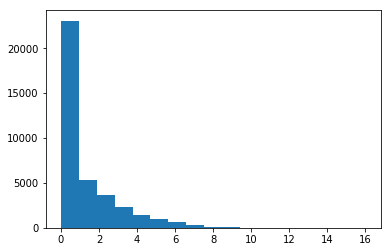

In [110]:
plt.hist(num_customers_line, bins=len(set(num_customers_line)))

(array([  1.43460000e+04,   8.72300000e+03,   5.33000000e+03,
          3.61900000e+03,   2.34400000e+03,   1.37100000e+03,
          9.52000000e+02,   6.61000000e+02,   3.06000000e+02,
          1.17000000e+02,   5.50000000e+01,   2.70000000e+01,
          1.70000000e+01,   1.60000000e+01,   1.00000000e+00,
          1.60000000e+01,   2.40000000e+01]),
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.]),
 <a list of 17 Patch objects>)

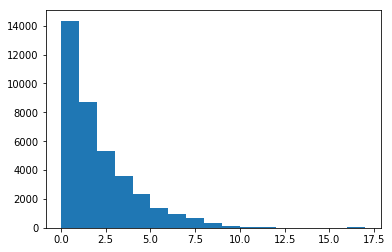

In [111]:
plt.hist(num_customers_system, bins=len(set(num_customers_line)))

In [112]:
counts_to_table(num_customers_system)

{0: 0.37827290705339484,
 1: 0.23000659195781148,
 2: 0.14054054054054055,
 3: 0.09542518127883981,
 4: 0.061806196440342784,
 5: 0.036150296638101515,
 6: 0.025102175346077785,
 7: 0.017429136453526697,
 8: 0.008068556361239288,
 9: 0.003085036255767963,
 10: 0.0014502307185234014,
 11: 0.0007119314436387607,
 12: 0.00044825313117996047,
 13: 0.00042188529993408044,
 14: 2.6367831245880027e-05,
 15: 0.00042188529993408044,
 16: 0.0005800922874093606,
 17: 5.2735662491760055e-05}

In [113]:
counts_to_table(num_customers_line)

{0: 0.6082794990112064,
 1: 0.14054054054054055,
 2: 0.09542518127883981,
 3: 0.061806196440342784,
 4: 0.036150296638101515,
 5: 0.025102175346077785,
 6: 0.017429136453526697,
 7: 0.008068556361239288,
 8: 0.003085036255767963,
 9: 0.0014502307185234014,
 10: 0.0007119314436387607,
 11: 0.00044825313117996047,
 12: 0.00042188529993408044,
 13: 2.6367831245880027e-05,
 14: 0.00042188529993408044,
 15: 0.0005800922874093606,
 16: 5.2735662491760055e-05}

In [114]:
np.mean(time_spent_in_queue)

13.75228832951945

In [115]:
np.mean(time_spent_in_system)

22.084954233409611

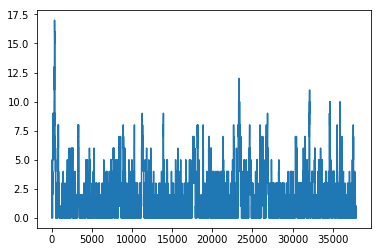

In [116]:
plt.plot(range(len(num_customers_system)), num_customers_system)

In [129]:
first_valid = 0
for i, c in enumerate(customer_arrival):
    if c >= 7000:
        first_valid = i
        break

In [130]:
first_valid

519

In [119]:
steady_arrivals = customer_arrival[first_valid:]
steady_services = customer_service[first_valid:]
steady_departures = customer_departure[first_valid:]

In [120]:
times_in_queue = steady_services - steady_arrivals[:len(steady_services)]
times_in_system = steady_departures - steady_arrivals[:len(steady_departures)]

In [121]:
np.mean(times_in_queue)

12.97834470483536

In [122]:
np.mean(times_in_system)

21.294274695935925

In [123]:
np.mean(num_customers_line[1500:])

0.96183939601921753

In [124]:
np.mean(num_customers_system[1500:])

1.5810295126973233

In [125]:
rolling_average = []
acc = 0.0
n = 1.0
for c in num_customers_system:
    acc += c
    rolling_average.append(acc/n)

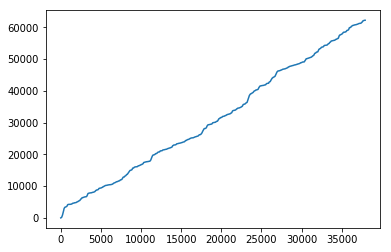

In [131]:
rolling_average = np.array(rolling_average)
plt.plot(range(len(rolling_average)), 
         rolling_average)

In [132]:
np.mean(num_customers_line[first_valid:])

0.95687857562957812

In [133]:
np.mean(num_customers_system[first_valid:])

1.5742394268299202